**Analýza - match_results**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
match_results = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/match_results.csv')

<ipython-input-2-76aeb087303b>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  match_results = pd.read_csv('/content/drive/MyDrive/Diplomová práca - Extrakcia a vyhodnocovanie herných dát/Datasety/match_results.csv')


In [ ]:
match_results.head()

,Unnamed: 0,data_unix,event_name,map,match_id,match_link,offset,team_1_id,team_1_link,team_1_name,...,team_2_link,team_2_name,team_2_score,timestamp,hour,day,week,month,year,weekday
0,0,1622397600000,Elisa Invitational Summer 2021 Regionals,Overpass,121306,/stats/matches/mapstatsid/121306/case-vs-copen...,0,10894,/stats/teams/10894/case,Case,...,/stats/teams/7461/copenhagen-flames,Copenhagen Flames,16,2021-05-30 15:00:00,15,30,21,5,2021,6
1,1,1622397600000,Elisa Invitational Summer 2021 Regionals,Inferno,121296,/stats/matches/mapstatsid/121296/copenhagen-fl...,0,7461,/stats/teams/7461/copenhagen-flames,Copenhagen Flames,...,/stats/teams/10894/case,Case,3,2021-05-30 15:00:00,15,30,21,5,2021,6
2,2,1622394900000,ESEA Spring Cash Cup 6 Europe,Inferno,121298,/stats/matches/mapstatsid/121298/mad-lions-vs-...,0,8362,/stats/teams/8362/mad-lions,MAD Lions,...,/stats/teams/11103/19cm-gang,19CM GANG,8,2021-05-30 14:15:00,14,30,21,5,2021,6
3,3,1622394900000,ESEA Spring Cash Cup 6 Europe,Mirage,121292,/stats/matches/mapstatsid/121292/mad-lions-vs-...,0,8362,/stats/teams/8362/mad-lions,MAD Lions,...,/stats/teams/11103/19cm-gang,19CM GANG,16,2021-05-30 14:15:00,14,30,21,5,2021,6
4,4,1622394600000,Ghetto eGames Cup 5,Vertigo,121304,/stats/matches/mapstatsid/121304/contact-light...,0,11104,/stats/teams/11104/contact-light,Contact Light,...,/stats/teams/11079/trasko,Trasko,19,2021-05-30 14:10:00,14,30,21,5,2021,6


In [ ]:
print(match_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94607 entries, 0 to 94606
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    94607 non-null  int64 
 1   data_unix     94607 non-null  int64 
 2   event_name    94607 non-null  object
 3   map           94607 non-null  object
 4   match_id      94607 non-null  int64 
 5   match_link    94607 non-null  object
 6   offset        94607 non-null  int64 
 7   team_1_id     94607 non-null  int64 
 8   team_1_link   94607 non-null  object
 9   team_1_name   94607 non-null  object
 10  team_1_score  94607 non-null  int64 
 11  team_2_id     94607 non-null  int64 
 12  team_2_link   94607 non-null  object
 13  team_2_name   94607 non-null  object
 14  team_2_score  94607 non-null  object
 15  timestamp     94607 non-null  object
 16  hour          94607 non-null  int64 
 17  day           94607 non-null  int64 
 18  week          94607 non-null  int64 
 19  mont

In [ ]:
match_results_filtered = match_results.drop(columns=['Unnamed: 0', 'data_unix', 'match_link', 'team_1_link', 'team_2_link'])

In [ ]:
match_results_filtered.head()

,event_name,map,match_id,offset,team_1_id,team_1_name,team_1_score,team_2_id,team_2_name,team_2_score,timestamp,hour,day,week,month,year,weekday
0,Elisa Invitational Summer 2021 Regionals,Overpass,121306,0,10894,Case,8,7461,Copenhagen Flames,16,2021-05-30 15:00:00,15,30,21,5,2021,6
1,Elisa Invitational Summer 2021 Regionals,Inferno,121296,0,7461,Copenhagen Flames,16,10894,Case,3,2021-05-30 15:00:00,15,30,21,5,2021,6
2,ESEA Spring Cash Cup 6 Europe,Inferno,121298,0,8362,MAD Lions,16,11103,19CM GANG,8,2021-05-30 14:15:00,14,30,21,5,2021,6
3,ESEA Spring Cash Cup 6 Europe,Mirage,121292,0,8362,MAD Lions,12,11103,19CM GANG,16,2021-05-30 14:15:00,14,30,21,5,2021,6
4,Ghetto eGames Cup 5,Vertigo,121304,0,11104,Contact Light,16,11079,Trasko,19,2021-05-30 14:10:00,14,30,21,5,2021,6


In [ ]:
match_results['team_2_score'] = pd.to_numeric(match_results['team_2_score'], errors='coerce')

# Vytvorenie nového stĺpca, ktorý určuje víťaza zápasu
match_results['winner'] = match_results.apply(
    lambda row: row['team_1_name'] if row['team_1_score'] > row['team_2_score'] else row['team_2_name'], axis=1
)

Ktoré tímy majú najviac výhier?

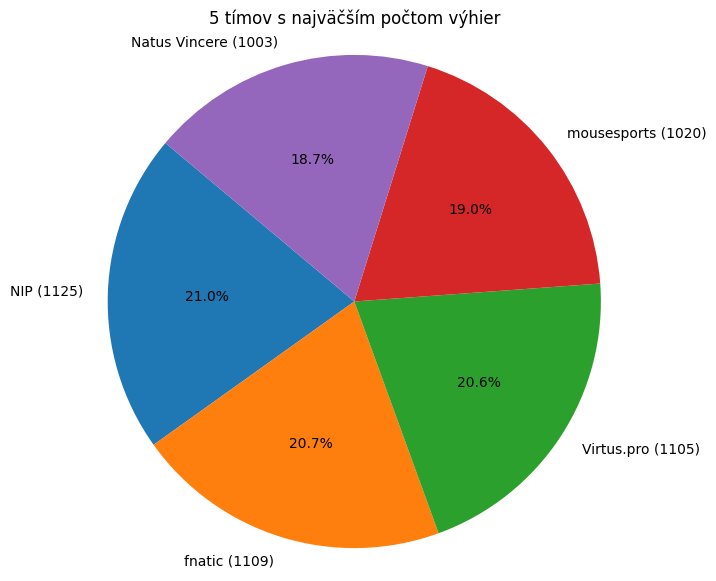

In [ ]:
top_winners = match_results['winner'].value_counts().head(5)

# popisy
labels = [f'{team} ({wins})' for team, wins in top_winners.items()]

plt.figure(figsize=(7, 7))
plt.pie(top_winners, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('5 tímov s najväčším počtom výhier')
plt.axis('equal')
plt.show()

Ktoré tímy majú celkovo najväčší winrate?

In [ ]:
# Celkový počet výhier tímov
wins = match_results['winner'].value_counts().reset_index()
wins.columns = ['team', 'wins']

# Celkový počet zápasov tímov
total_matches = pd.concat([match_results['team_1_name'], match_results['team_2_name']]).value_counts().reset_index()
total_matches.columns = ['team', 'total_matches']

In [ ]:
# Spojenie dát a výpočet winrate
winratetotal = pd.merge(wins, total_matches, on='team')
winratetotal['winrate'] = winratetotal['wins'] / winratetotal['total_matches']

In [ ]:
# Filtrovanie tímov s aspoň 80 odohranými zápasmi
winrate_filtered = winratetotal[winratetotal['total_matches'] >= 80]

In [ ]:
top_5_winrate = winrate_filtered.sort_values(by='winrate', ascending=False).head(5)
print(top_5_winrate)

           team  wins  total_matches   winrate
246         g3x    77            101  0.762376
211       Kings    92            122  0.754098
49    Grayhound   401            553  0.725136
214  Extra Salt    91            128  0.710938
132   VeryGames   168            237  0.708861


Ktoré mapy sú najviac hrávané?

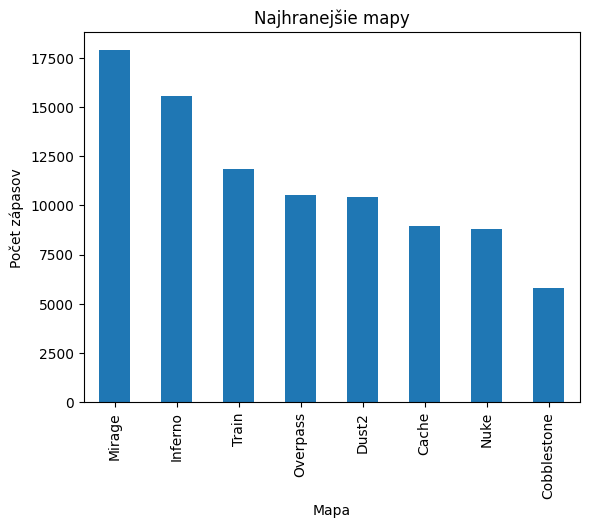

In [ ]:
match_results['map'].value_counts().head(8).plot(kind='bar')
plt.title('Najhranejšie mapy')
plt.xlabel('Mapa')
plt.ylabel('Počet zápasov')
plt.show()

Zobrazenie tímov s najvyšším winrate pre každú mapu

In [ ]:
# Počet vyhier tímov na jednotlivých mapách
win_counts = match_results.groupby(["map", "winner"]).size().reset_index(name="wins")

# Celkový počet zápasov tímov na mapách
match_counts = match_results.melt(id_vars=["map"], value_vars=["team_1_name", "team_2_name"], var_name="team_column", value_name="team") \
    .groupby(["map", "team"]).size().reset_index(name="total_matches")

# Výpočet winrate
winrate = pd.merge(win_counts, match_counts, left_on=["map", "winner"], right_on=["map", "team"])
winrate["winrate"] = winrate["wins"] / winrate["total_matches"]

winrate_filtered = winrate[winrate["total_matches"] >= 80]

best_teams_per_map = winrate_filtered.loc[winrate_filtered.groupby('map')['winrate'].idxmax()]

In [ ]:
# Zoradenie podľa winrate
best_teams_sorted = best_teams_per_map[["map", "winner", "winrate", "total_matches"]].sort_values(by=["map"], ascending=[True])

print(best_teams_sorted)

               map           winner   winrate  total_matches
1145         Cache            TYLOO  0.729927            137
2229   Cobblestone            TYLOO  0.731707             82
3585         Dust2            TYLOO  0.688525            122
5478       Inferno    Tainted Minds  0.746988             83
7677        Mirage            TYLOO  0.739414            307
8456          Nuke         Astralis  0.707317            164
10174     Overpass        Grayhound  0.792453            106
12019        Train            ORDER  0.752577             97
12777      Vertigo  ALTERNATE aTTaX  0.600000             85


Najhoršie tímy na každej mape

In [ ]:
worst_teams_per_map = winrate_filtered.loc[winrate_filtered.groupby('map')['winrate'].idxmin()]
worst_teams_sorted = worst_teams_per_map[["map", "winner", "winrate", "total_matches"]].sort_values(by=["map"], ascending=[True])
print("\nNajhoršie tímy na každej mape:")
print(worst_teams_sorted)


Najhoršie tímy na každej mape:
               map       winner   winrate  total_matches
793          Cache          NRG  0.454545             88
1656   Cobblestone          CLG  0.495575            113
3281         Dust2    Nordavind  0.409091             88
4816       Inferno  Izako Boars  0.369565             92
6988        Mirage         LDLC  0.378151            119
9151          Nuke        SKADE  0.314607             89
10104     Overpass     FlipSid3  0.461538            130
11489        Train     Dignitas  0.424779            113
12864      Vertigo     Endpoint  0.550000             80


Analýza úspechu tímu NIP v časových obdobiach

In [ ]:
# Filtrujeme zápasy, kde NIP hral
nip_matches = match_results[
    (match_results['team_1_name'] == 'NIP') | (match_results['team_2_name'] == 'NIP')
]

# stĺpec NIP_win, kt. označuje či NIP vyhral zápas
nip_matches['NIP_win'] = nip_matches.apply(
    lambda row: 1 if (
        (row['team_1_name'] == 'NIP' and row['team_1_score'] > row['team_2_score'])
        or (row['team_2_name'] == 'NIP' and row['team_2_score'] > row['team_1_score'])
    ) else 0,
    axis=1,
)

nip_matches['timestamp'] = pd.to_datetime(nip_matches['timestamp'])

# Stĺpce pre rok a mesiac
nip_matches['year'] = nip_matches['timestamp'].dt.year
nip_matches['month'] = nip_matches['timestamp'].dt.month

<ipython-input-15-8017b17550d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nip_matches['NIP_win'] = nip_matches.apply(
<ipython-input-15-8017b17550d1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nip_matches['timestamp'] = pd.to_datetime(nip_matches['timestamp'])
<ipython-input-15-8017b17550d1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
# Vypočítanie winrate pre NIP v každom kvartáli
nip_matches['quarter'] = (nip_matches['month'] - 1) // 3 + 1
nip_winrate_quarterly = (
    nip_matches.groupby(['year', 'quarter'])['NIP_win'].agg(['mean', 'count']).reset_index()
)

# Stĺpec pre kvartál
nip_winrate_quarterly['quarter_str'] = (
    nip_winrate_quarterly['year'].astype(str)
    + '-Q'
    + nip_winrate_quarterly['quarter'].astype(str)
)

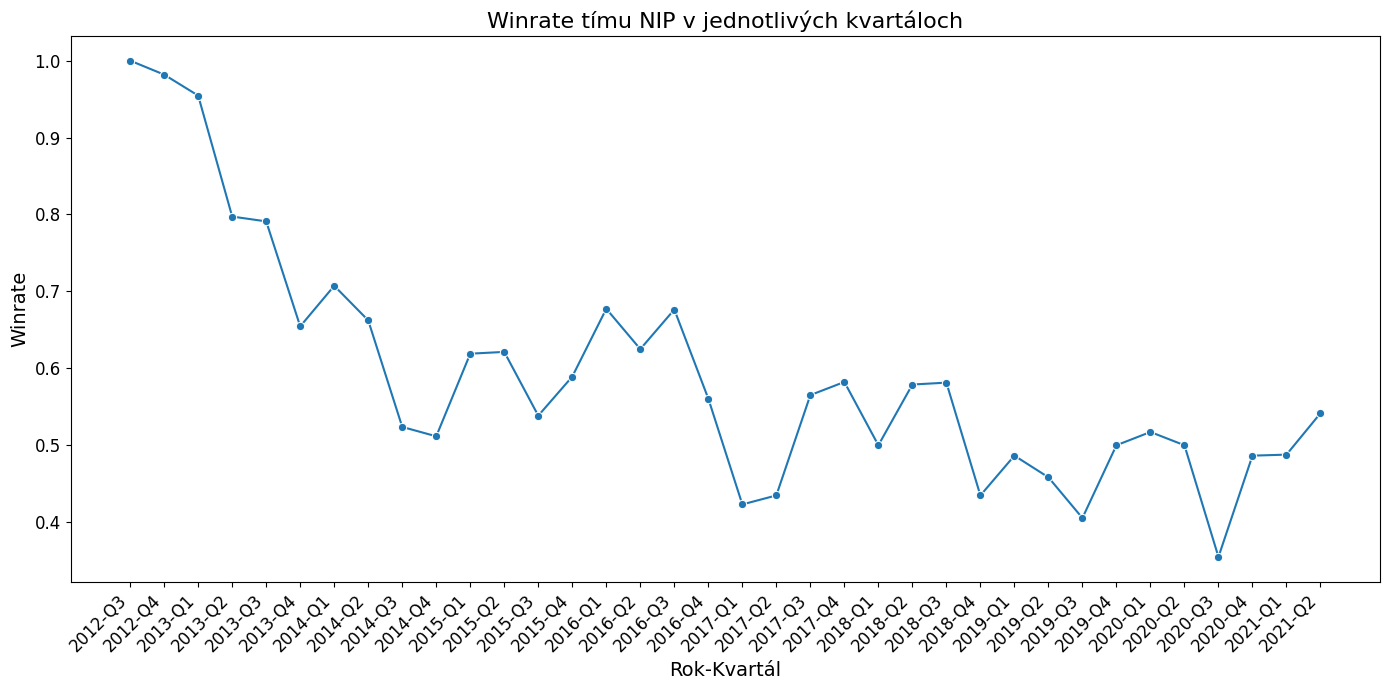

   quarter_str      mean  count
0      2012-Q3  1.000000      9
1      2012-Q4  0.981818     55
2      2013-Q1  0.954545     66
3      2013-Q2  0.797297     74
4      2013-Q3  0.791045     67
5      2013-Q4  0.654545     55
6      2014-Q1  0.707317     41
7      2014-Q2  0.662338     77
8      2014-Q3  0.523810     63
9      2014-Q4  0.511628     43
10     2015-Q1  0.619048     84
11     2015-Q2  0.621359    103
12     2015-Q3  0.538462     39
13     2015-Q4  0.589286     56
14     2016-Q1  0.677419     31
15     2016-Q2  0.625000     72
16     2016-Q3  0.676471     34
17     2016-Q4  0.560606     66
18     2017-Q1  0.423077     26
19     2017-Q2  0.434783     46
20     2017-Q3  0.565217     46
21     2017-Q4  0.582278     79
22     2018-Q1  0.500000     44
23     2018-Q2  0.578947     57
24     2018-Q3  0.581395     43
25     2018-Q4  0.434783     69
26     2019-Q1  0.486486     37
27     2019-Q2  0.458333     48
28     2019-Q3  0.405405     37
29     2019-Q4  0.500000     62
30     2

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=nip_winrate_quarterly, x='quarter_str', y='mean', marker='o'
)
plt.title('Winrate tímu NIP v jednotlivých kvartáloch', fontsize=16)
plt.xlabel('Rok-Kvartál', fontsize=14)
plt.ylabel('Winrate', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print(nip_winrate_quarterly[['quarter_str', 'mean', 'count']])